# Clase Nº 6

**Plan de la clase:**  
**(1)** Preguntas sobre la clase asincrónica. <br>
**(2)** Repaso de `pd.DataFrame.merge`. <br>
**(3)** Unir un dataframe con un geodataframe y visualizar atributos en un mapa <br>
**(4)** Unir dos geodataframes en base a atributos espaciales <br>

### Preguntas sobre la clase asincrónica

...

### Repaso de `pd.DataFrame.merge`

___

### Unir un geodataframe con un dataframe a través de un atributo no espacial

Vamos a ejemplificar cómo unir un `DataFrame` de Pandas con un `GeoDataFrame` de Geopandas.
Para eso vamos a utilizar una tabla que contiene la población de las distintas provincias argentinas, y el shapefile de las provincias que ya vimos en la clase asincrónica.

In [10]:
import numpy as np
import pandas as pd
import geopandas as gpd

Descarguemos la tabla de población por provincia de [esta página](https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/Poblacion2) del sitio del IGN.
Para eso utilizamos la función `read_html` de `Pandas` que es capaz de extraer tablas de un archivo `html`.
Pueden necesitar instalar el paquete `lxml`, con `pip install lxml` en la terminal/cmd.

In [4]:
import pandas as pd

Preprocesamos el dataframe de población:

In [15]:
def convertir_a_int(fila, cols=["Año 2010", "Año 2015", "Año 2020"]):    

    '''
    Convertir cols, que contienen strings de números con "." como separador de miles, a tipo entero.
    '''
    
    try:
        for col in cols:
            fila[col] = int(fila[col].replace(".",""))
    except:
        pass
        
    return fila

___

Ahora carguemos un GeoDataFrame con las provincias de Argentina:

Examinemos el mapa generado al plotear la geometría asociada a este `GeoDataFrame`.

Bounding box para excluir a la Antártida:

In [20]:
TdF_bounding_box = (-75,-60,-40,-55)
xmin, ymin, xmax, ymax = TdF_bounding_box

Usemos indexado de `GeoDataFrame`s (`gpd.GeoDataFrame.cx`) para seleccionar la fila correspondiente a Tierra del Fuego.

¿Cómo luce el mapa para esta fila sola?

Notar que pese a que utilizamos una bounding box que excluía a la Antártida, el indexado por coordenadas no funcionó para excluirla. La razón es que esta jurisdicción es un multipolígono (`MultiPolygon`) y el indexado por coordenadas nos trae el multipolígono completo, no los polígonos individuales que pertenecen a la bounding box.

In [23]:
from shapely.geometry.multipolygon import MultiPolygon

In [24]:
TdF_bounding_box = (-75,-60,-40,-55)
xmin, ymin, xmax, ymax = TdF_bounding_box

TdF_muchos_poligonos = TdF_Antartida_islas.geometry.explode(index_parts=True)
TdF_muchos_poligonos = TdF_muchos_poligonos.cx[xmin:xmax, ymin:ymax]
TdF_muchos_poligonos = TdF_muchos_poligonos.to_list()

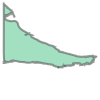

In [25]:
TdF_multipol = MultiPolygon(TdF_muchos_poligonos)
TdF_multipol

___

### Ejercicio 1

Crear una _bounding box_ similar a la creada para Tierra del Fuego, pero ahora para las Islas Malvinas. Seguir un procedimiento similar al realizado para Tierra del Fuego, finalmente agregar la geometría de las Islas Malvinas al multipolígono de Tierra del Fuego creado anteriormente. Finalmente, agregar esta geometría al GeoDataframe.

In [26]:
# Completar con coordenadas adecuadas
# IM_bounding_box = (, , , )
# xmin, ymin, xmax, ymax = IM_bounding_box

# El resto de su código va acá


### Ejercicio 2

Unir las bases `provincias_gdf` y `poblacion_df` por el nombre de la provincia. Notar que necesitamos especificar `left_on` y `right_on` porque los nombres de las columnas correspondientes son diferentes (o bien cambiar el nombre de una de las columnas).

- Examinar el tipo de objeto que resulta del `merge` usando `provincias_gdf` a la izquierda y `poblacion_df` a la derecha.
- Ídem anterior, con `poblacion_df` a la izquierda y `provincias_gdf` a la derecha.

A continuación, representar un mapa del país coloreando cada provincia en base a su población. Para el merge, usar el orden que (Geo)DataFrame's que corresponda.

Finalmente, usando el archivo tabular `datos/superficie_provincias.csv`, hacer un plot similar pero con la densidad de población en lugar de la población.

___

### Unir geodatraframes por un atributo espacial: `sjoin`

**Ejercicio (para hacer entre todos):** Leer el shapefile de departamentos como GeoDataFrame. Crear un widget reactivo que permita elegir una provincia y muestre un mapa con la división departamental de la misma.

Geopandas permite unir dos GeoDataFrames en base a relaciones espaciales entre las observaciones (filas) de cada uno.

Vamos a usar estas relaciones espaciales para poder vincular departamentos con provincias.

In [30]:
departamentos_gdf = gpd.read_file("datos/departamento.zip", crs='EPSG:4326')

# Extraemos las columnas de interés
# objectid es un identificador único para cada departamento a nivel país 
# Lo necesitamos porque hay departamentos cuyos nombres se repiten en distintas provincias.
departamentos_gdf = departamentos_gdf[["objectid", "nam", "geometry"]]

# Renombramos la columna que da el nombre del departamento
departamentos_gdf = departamentos_gdf.rename({"nam":"departamento"}, axis=1)

Examinemos este GeoDataFrame. ¿Qué problema nos encontramos?

In [31]:
departamentos_gdf

,objectid,departamento,geometry
0,8076.0,Federal,"POLYGON ((-58.57731 -30.69016, -58.57512 -30.6..."
1,8077.0,Gualeguaychú,"POLYGON ((-58.13011 -33.02912, -58.13087 -33.0..."
2,8078.0,Islas del Ibicuy,"POLYGON ((-58.57589 -34.02675, -58.57593 -34.0..."
3,8268.0,Cushamen,"POLYGON ((-71.17490 -41.99995, -71.05132 -41.9..."
4,8079.0,Victoria,"POLYGON ((-59.77158 -32.58791, -59.77198 -32.5..."
...,...,...,...
524,8576.0,Iglesia,"POLYGON ((-69.62981 -28.39369, -69.62956 -28.3..."
525,8577.0,Jáchal,"POLYGON ((-68.25879 -29.74673, -68.26262 -29.7..."
526,8578.0,Valle Fértil,"POLYGON ((-67.99199 -29.97924, -67.99151 -29.9..."
527,8579.0,La Plata,"MULTIPOLYGON (((-57.99666 -34.87535, -57.99087..."


El problema es que **no tenemos la provincia** asociada a cada departamento.

___

Obtenemos los centroides de cada departamento para establecer la relación de pertenencia con la provincia.

In [46]:
departamentos_centroid_gdf = departamentos_gdf.copy()
departamentos_centroid_gdf["geometry"] = departamentos_gdf.geometry.centroid

/tmp/ipykernel_628592/3796721676.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  departamentos_centroid_gdf["geometry"] = departamentos_gdf.geometry.centroid


Ahora realizamos el **join espacial** con `sjoin`. Utilizamos el predicado `within`. Este es el tipo de relación que deseamos: queremos que el centroide de cada departamento esté adentro de (_within_) la geometría de la provincia.
Para ver una lista extensiva de predicados posibles se puede consultar [esta página de documentación de Shapely](https://shapely.readthedocs.io/en/stable/manual.html) (sección **Relationships**) o [este PDF](https://giswiki.hsr.ch/images/3/3d/9dem_springer.pdf). Otros valores posibles son `intersects`, `contains`, `overlaps` y `touches`.

In [47]:
prov_dep_gdf = departamentos_centroid_gdf.sjoin(provincias_gdf, predicate="within")

NameError: name 'provincias_gdf' is not defined

In [ ]:
prov_dep_df = prov_dep_gdf[["objectid", "nam"]]

In [ ]:
departamentos_gdf = departamentos_gdf.merge(prov_dep_df, how="inner", on="objectid")

In [ ]:
provincias = set(departamentos_gdf.nam.to_list())

Ahora representamos la división departamental de cada provincia en un mapa.

In [ ]:
import ipywidgets as widgets 
from ipywidgets import interact

def mostrar_deptos_por_provincia(provincia):
    tmp_gdf = departamentos_gdf[departamentos_gdf["nam"]==provincia]
    tmp_gdf.plot(cmap="tab10", figsize=(10,10))

interact(
    mostrar_deptos_por_provincia, 
    provincia=widgets.Dropdown(
        options=sorted(list(provincias)) # ordenamos alfabéticamente
    )
);